In [2]:
import pandas as pd

In [6]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\ML Project - Logistic Regression Titanic Survival U16955478860.csv")

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
data=data.dropna()

In [39]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C


In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='count'>

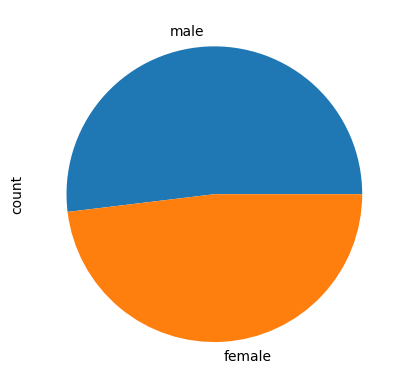

In [91]:
data["Sex"].value_counts().plot(kind="pie")

In [103]:
data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.148495,-0.089136,0.030933,-0.083488,-0.051454,0.029740
Survived,0.148495,1.000000,-0.034542,-0.254085,0.106346,0.023582,0.134241
Pclass,-0.089136,-0.034542,1.000000,-0.306514,-0.103592,0.047496,-0.315235
Age,0.030933,-0.254085,-0.306514,1.000000,-0.156162,-0.271271,-0.092424
SibSp,-0.083488,0.106346,-0.103592,-0.156162,1.000000,0.255346,0.286433
Parch,-0.051454,0.023582,0.047496,-0.271271,0.255346,1.000000,0.389740
Fare,0.029740,0.134241,-0.315235,-0.092424,0.286433,0.389740,1.000000


<Axes: >

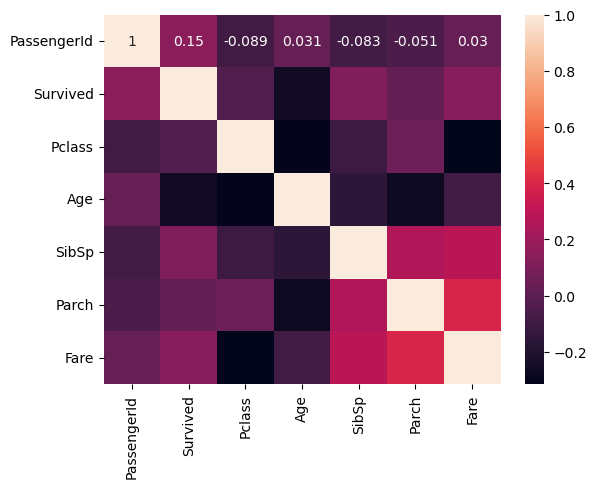

In [99]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [119]:
from sklearn.preprocessing import LabelEncoder

In [127]:
Enc = LabelEncoder()
df1=data.select_dtypes(include=object)
df2=data.select_dtypes(exclude=object)

In [129]:
df1=df1.select_dtypes(include=object).apply(Enc.fit_transform)

In [131]:
df1

,Name,Sex,Ticket,Cabin,Embarked
1,49,0,109,72,0
3,70,0,31,48,2
6,112,1,55,117,2
10,148,0,120,131,2
11,27,0,26,43,2
...,...,...,...,...,...
871,18,0,33,91,2
872,35,1,89,29,2
879,140,0,38,61,0
887,75,0,10,25,2


In [133]:
data=pd.concat((df1,df2),axis=1)

In [135]:
data

,Name,Sex,Ticket,Cabin,Embarked,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,49,0,109,72,0,2,1,1,38.0,1,0,71.2833
3,70,0,31,48,2,4,1,1,35.0,1,0,53.1000
6,112,1,55,117,2,7,0,1,54.0,0,0,51.8625
10,148,0,120,131,2,11,1,3,4.0,1,1,16.7000
11,27,0,26,43,2,12,1,1,58.0,0,0,26.5500
...,...,...,...,...,...,...,...,...,...,...,...,...
871,18,0,33,91,2,872,1,1,47.0,1,1,52.5542
872,35,1,89,29,2,873,0,1,33.0,0,0,5.0000
879,140,0,38,61,0,880,1,1,56.0,0,1,83.1583
887,75,0,10,25,2,888,1,1,19.0,0,0,30.0000


In [137]:
x=data.drop("Survived",axis=1)
y=data["Survived"]

In [139]:
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=10,train_size=0.8)

In [143]:
x_train

,Name,Sex,Ticket,Cabin,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
27,64,1,63,55,2,28,1,19.0,3,2,263.0000
151,133,0,24,53,2,152,1,22.0,1,0,66.6000
369,9,0,97,19,0,370,1,24.0,0,0,69.3000
889,20,1,8,52,0,890,1,26.0,0,0,30.0000
292,102,1,123,80,0,293,2,36.0,0,0,12.8750
...,...,...,...,...,...,...,...,...,...,...,...
556,56,0,36,1,0,557,1,48.0,1,0,39.6000
329,89,0,7,13,0,330,1,16.0,0,1,57.9792
96,74,1,112,9,0,97,1,71.0,0,0,34.6542
618,16,0,67,130,2,619,2,4.0,2,1,39.0000


In [145]:
y_train

27     0
151    1
369    1
889    1
292    0
      ..
556    1
329    1
96     0
618    1
54     0
Name: Survived, Length: 146, dtype: int64

In [147]:
from sklearn.preprocessing import StandardScaler

In [155]:
Scaler = StandardScaler()

In [165]:
Scaler.fit(x_train)

StandardScaler()

In [167]:
x_train_scaled = Scaler.transform(x_train)
x_test_scaled = Scaler.transform(x_test)

In [175]:
Scaler.mean_

array([ 91.43835616,   0.52054795,  63.84931507,  68.05479452,
         1.28082192, 459.67123288,   1.19863014,  36.70547945,
         0.47945205,   0.49315068,  75.78986986])

In [181]:
x_train_scaled

,Name,Sex,Ticket,Cabin,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,-0.523075,0.959715,-0.023250,-0.332983,0.752133,-1.728730,-0.373735,-1.134675,3.736474,1.935492,2.610695
1,0.792317,-1.041976,-1.090876,-0.383996,0.752133,-1.232143,-0.373735,-0.942417,0.771663,-0.633434,-0.128155
2,-1.571576,-1.041976,0.907501,-1.251219,-1.339513,-0.359110,-0.373735,-0.814244,-0.710742,-0.633434,-0.090503
3,-1.361876,0.959715,-1.528876,-0.409503,-1.339513,1.723354,-0.373735,-0.686072,-0.710742,-0.633434,-0.638552
4,0.201343,0.959715,1.619251,0.304681,-1.339513,-0.667475,1.507827,-0.045211,-0.710742,-0.633434,-0.877364
...,...,...,...,...,...,...,...,...,...,...,...
141,-0.675584,-1.041976,-0.762376,-1.710337,-1.339513,0.389776,-0.373735,0.723822,0.771663,-0.633434,-0.504677
142,-0.046484,-1.041976,-1.556251,-1.404258,-1.339513,-0.519299,-0.373735,-1.326933,-0.710742,0.651029,-0.248374
143,-0.332439,0.959715,1.318126,-1.506285,-1.339513,-1.452403,-0.373735,2.197802,-0.710742,-0.633434,-0.573648
144,-1.438131,-1.041976,0.086250,1.580009,0.752133,0.638070,1.507827,-2.095966,2.254068,0.651029,-0.513044


In [179]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [183]:
import numpy as np

In [185]:
np.round(x_train_scaled.describe(), )

,Name,Sex,Ticket,Cabin,Embarked,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0,146.0
mean,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-2.0,-2.0,-1.0,-2.0,-0.0,-2.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,1.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,-1.0,-1.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,-0.0,1.0,1.0,1.0,0.0
max,2.0,1.0,2.0,2.0,1.0,2.0,3.0,3.0,4.0,5.0,6.0


In [197]:
from sklearn.linear_model import LogisticRegression

In [201]:
lr= LogisticRegression()

In [210]:
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [214]:
lr.score(x_train_scaled,y_train)

0.773972602739726

In [216]:
lr.score(x_test_scaled,y_test)

0.7837837837837838